# Active Noise Cancellation - Simulation


### Introducción
introduccir del TP la explicación de ANC

### Objetivo y alcance
Para este proyecto vamos a realizar la simulación de un sistema de control de audio para llevar a cabo la cancelación activa de ruido. Para realizar este desarrollo vamos a implementar los conceptos estudiados en la materia de Teoría de control, dictada por la Universidad Tecnologica Nacional.
El objetivo principal va a ser lograr obtener las ondas senoidales de sonidos opuestas de distintos ruidos ambientes, estos sonidos ambientes los vamos a obtener de un dataset de acceso público.  
Al realizar este proyecto nos vamos a encontrar con ciertas limitantes que van a acotar el alcance del proyecto. A continuación se listan los puntos limitantes que dan lugar al alcance del trabajo:

### Implementación

Primero vamos a armar nuestro caso de prueba, donde vamos a generar un sonido en base a su onda senoidal, definiendo amplitud, frecuencia y fase.

In [10]:
!pip install matplotlib
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



     ---------------------------------------- 0.0/159.4 kB ? eta -:--:--
     -- ------------------------------------- 10.2/159.4 kB ? eta -:--:--
     --------------- ----------------------- 61.4/159.4 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ - 153.6/159.4 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 159.4/159.4 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.6 MB 15.4 MB/s eta 0:00:01
   ------- -------------------------------- 1.4/7.6 MB 14.6 MB/s eta 0:00:01
   -------------- ------------------------- 2.7/7.6 MB 17.3 MB/s eta 0:00:01
   -------------------- ------------------- 4.0/7.6 MB 19.3 MB/s eta 0:00:01
   -------------------- ------------------- 4.0/7.6 MB 19.3 MB/s eta 0:00:01
   -------------------- ------------------- 4.0/7.6 MB 19.3 MB/s eta 0:00:01
   ---------------------------------------  7.6/7.6 MB 24.4 MB/s eta 0:00:01
   -

In [37]:
import time
import numpy as np
import pyaudio

p = pyaudio.PyAudio()

volume = 0.5  # rango [0.0, 1.0]
fs = 44100  # sampling rate, Hz, must be integer
duration = 10.0  # duracion del sonido
f = 440.0  # frecuencia senoidal - medida en Hz
ampl = 2

# generate samples, note conversion to float32 array
samples = (np.sin(ampl * np.pi * np.arange(fs * duration) * f / fs)).astype(np.float32)

# per @yahweh comment explicitly convert to bytes sequence
output_bytes = (volume * samples).tobytes()

# for paFloat32 sample values must be in range [-1.0, 1.0]
stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=fs,
                output=True)

# play. May repeat with different volume values (if done interactively)
start_time = time.time()
stream.write(output_bytes)
print("Played sound for {:.2f} seconds".format(time.time() - start_time))

stream.stop_stream()
stream.close()

p.terminate()

Played sound for 10.03 seconds


El sonido que se escucha al ejecutar el bloque anterior, va a ser nuestra simulación de ruido ambiente. Si bien este sonido está en condiciones ideales, nos va a servir a modo de ejemplo.  
A continuación se observa la onda senoidal que genera este sonido:

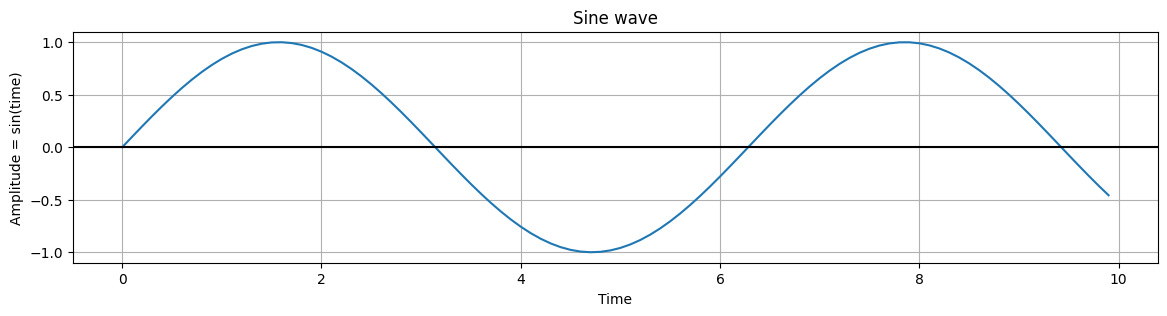

In [53]:
import numpy as np

import matplotlib.pyplot as plot

# Get x values of the sine wave
time = np.arange(0, 10, 0.1);

# Amplitude of the sine wave is sine of a variable like time
amplitude   = np.sin(time)

plot.figure(figsize=(14, 3))

# Plot a sine wave using time and amplitude obtained for the sine wave
plot.plot(time, amplitude)

# Give a title for the sine wave plot
plot.title('Sine wave')

# Give x axis label for the sine wave plot
plot.xlabel('Time')

# Give y axis label for the sine wave plot
plot.ylabel('Amplitude = sin(time)')

plot.grid(True, which='both')
plot.axhline(y=0, color='k')
plot.show()